# Cumulative error charts to show the diversity of model behavior

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib

In [3]:
# list of models
# Commented few models because they produced very big results which interfere visualization
models = [
          'ExtraTreesRegressor',
        'ExtraTreeRegressor',
        'RandomForestRegressor',
          'BaggingRegressor',
          'DecisionTreeRegressor',
                   'MLPRegressor',
          
          
           #'GaussianProcessRegressor',
          'GradientBoostingRegressor',
          'HuberRegressor',
    'TheilSenRegressor',
    'AdaBoostRegressor',
          'KNeighborsRegressor',
       'DummyRegressor'

          #'PassiveAggressiveRegressor',
          #'RANSACRegressor',
          #'SGDRegressor',
          
    
  
         ]
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']

In [5]:
def assign_buildingtype(name):
    if "Office" in name:
        return "Office"
    elif "PrimClass" in name:
        return "PrimClass"
    elif "UnivClass" in name:
        return "UnivClass"
    elif "UnivDorm" in name:
        return "UnivDorm"
    else:
        return "UnivLab"

In [6]:
for buildingtype in buildingtypes:
        # Draw lines on single plot
#         MAPE = {}
#         NMBE = {}
#         CVRSME = {}
    dataframes = []
    for i in range(len(models)):

        cv_range = range(1,5)

        for cv_mode in cv_range:


            data = pd.read_csv('../results/' + models[i] + '_metrics_cross_validation_'+str(cv_mode)+'.csv')
            #data = data.drop(columns=['Unnamed: 0'])
    #                 data['buidingtype'] = buildingtype
            data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
            data['cv_mode'] = str(cv_mode)
            data['model'] = models[i]
            dataframes.append(data)
            result = pd.concat(dataframes)

In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23136 entries, 0 to 481
Data columns (total 8 columns):
building        23136 non-null object
MAPE            23136 non-null float64
NMBE            23136 non-null float64
CVRSME          23136 non-null float64
RSQUARED        23136 non-null float64
buildingtype    23136 non-null object
cv_mode         23136 non-null object
model           23136 non-null object
dtypes: float64(4), object(4)
memory usage: 1.6+ MB


In [9]:
result.head()

,building,MAPE,NMBE,CVRSME,RSQUARED,buildingtype,cv_mode,model
0,UnivLab_Tracy,12.069027,4.081012,18.054658,0.280738,UnivLab,1,ExtraTreesRegressor
1,UnivLab_Tracie,7.730150,5.995834,10.752141,0.505270,UnivLab,1,ExtraTreesRegressor
2,UnivLab_Terrie,6.588024,4.577020,9.903526,0.529689,UnivLab,1,ExtraTreesRegressor
3,UnivLab_Taylor,7.934278,-2.887212,10.319570,0.567188,UnivLab,1,ExtraTreesRegressor
4,UnivLab_Tami,12.745281,-5.568999,15.372600,0.392011,UnivLab,1,ExtraTreesRegressor


In [38]:
consolidated = result[result.model=='ExtraTreesRegressor'].groupby("building").mean()

https://stackoverflow.com/questions/23248435/fill-between-two-vertical-lines-in-matplotlib

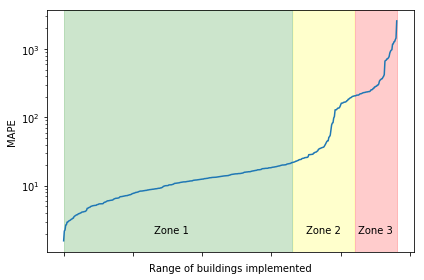

In [141]:
fig, ax = plt.subplots()

consolidated.MAPE.sort_values().plot(logy=True)
ax.axvspan(0, 330, alpha=0.2, color='green')
ax.axvspan(331, 420, alpha=0.2, color='yellow')
ax.axvspan(421, 482, alpha=0.2, color='red')

ax.annotate('Zone 1', xy=(200, 100), xytext=(130, 2))
ax.annotate('Zone 2', xy=(200, 100), xytext=(350, 2))
ax.annotate('Zone 3', xy=(200, 100), xytext=(425, 2))


ax.set_xlabel("Range of buildings implemented")
ax.set_ylabel("MAPE")

fig.tight_layout()
fig.savefig("error_zones.pdf")

plt.show()


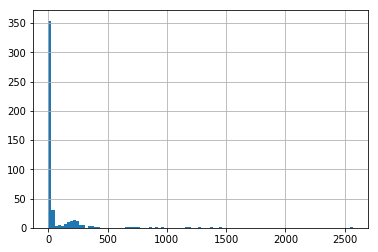

In [142]:
consolidated.MAPE.hist(bins=100)

In [143]:
error_groups = {}
for error_scenario in [1, 5,10,20,40,80,160]:
    error_scenario_list = []
    for iteration in range(1,1000):
        x = consolidated.sample(n=error_scenario).MAPE.median()
        error_scenario_list.append(x)
        
    error_groups[error_scenario] = pd.Series(error_scenario_list)

In [144]:
cohort_bar = pd.DataFrame(error_groups)

In [145]:
cohort_bar_melted = cohort_bar.melt()

In [146]:
cohort_bar_melted.head()

,variable,value
0,1,12.304052
1,1,11.395104
2,1,12.481512
3,1,7.534916
4,1,252.826519


In [147]:
cohort_bar_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6993 entries, 0 to 6992
Data columns (total 2 columns):
variable    6993 non-null int64
value       6993 non-null float64
dtypes: float64(1), int64(1)
memory usage: 109.3 KB


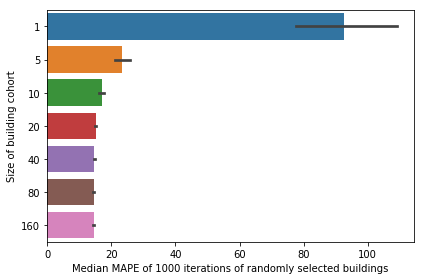

In [148]:
fig, ax = plt.subplots()

ax = sns.barplot(x="value", y="variable", data=cohort_bar_melted, orient='h')
ax.set_xlabel("Median MAPE of 1000 iterations of randomly selected buildings")
ax.set_ylabel("Size of building cohort")

fig.tight_layout()
fig.savefig("cohort_size_analysis.pdf")

plt.show()